In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Energy Loss distribution with Sage

$\dfrac{dN}{dy}=NL\displaystyle\int_{0}^{\pi}\int_{\omega_{min}}^{\infty}\frac{d\sigma_c}{dy}(1+\cos(\alpha))dn_\gamma(\omega_0,T)d\omega_0\frac{d\Omega}{4\pi}$

In [2]:
from scipy import constants 
import numpy as np

## Control Panel

And the global constants are $k_B$, $r_e$, $\hbar c$ and $m_e c^2$

In [3]:
kB = 8.617333262e-5 #eV/K
hbarcA=197.3 #eV*\mu*m
hbarc=hbarcA*1e-9 #eV*m
re=2.8179402894e-15 #m
mec2=5.11e5 #eV

The constants for all the first run are $E$, $T$

In [62]:
Eb=5e11 #eV
temp=300
Np=10e12 #number o particles
L=5000 #m 

The variables to be setted to testing are $y$, $\omega$ and $\cos{\alpha}$

In [5]:
y_test=0.25
w_test=1
C_atest=1.0

x_test=2*Eb*w_test*(1+C_atest)/((5.11e5)^2)
wmin_test=y_test*(5.11e5^2)/((2-(2*y_test))*Eb*(1+C_atest))
wmin_test
x_test

0.0435201666666667

7.65928439305916

## For the planck distribution

$dn_\gamma=\dfrac{\omega_0^2d\omega_o}{\pi^2c^3\hbar^3(\exp(\omega_0/k_BT)-1)}$

### Here the temperature was setted in 300K and all the units were handled in eV and meters

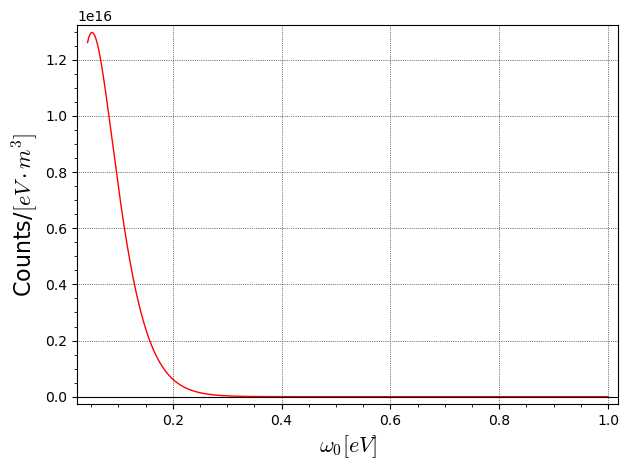

In [6]:
w,C_a=var('w,C_a')
n(w)=w^2/(np.pi^2*hbarc^3*(np.exp(w/(kB*temp)-1)))

plot1=n.plot(wmin_test,1,frame=true,color='red',gridlines=true)
plot1.axes_labels([r'$\omega_0[eV]$',r'Counts/$[eV\cdot m^3]$'])
plot1

## For the compton cross section

$\dfrac{d\sigma_c}{dy}=\dfrac{2\pi r_e^2}{x}\left[\dfrac{1}{1-y}+1-y-4r(1-r)\right]$

This dimentionless parameter is computed by dividing two squared energies

$x=\dfrac{4E_0\omega_0\cos^2(\alpha/2)}{m_e^2c^4}=\dfrac{2E_0\omega_0(1+\cos(\alpha))}{m_e^2c^4}$

The limits to be evaluated next has to be $x\in[0,1]$ and $\cos(\alpha)\in[-1,1]$ $\omega\in[]$

### The first plot for $\normalsize{x}$ is keeping $\normalsize{\cos(\alpha)}=1$ as a constant

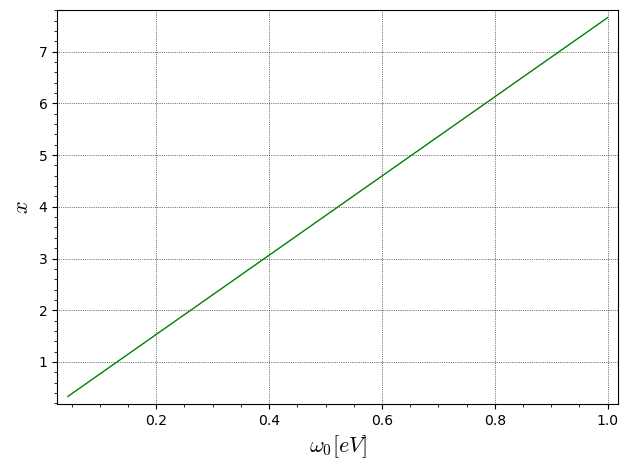

3.82964219652958

In [7]:
x(w,C_a)=2*Eb*w*(1+C_a)/(5.11e5)^2
plot2=x(w,1).plot(wmin_test,1,frame=true,gridlines=true,color='green')
plot2.axes_labels([r'$\omega_0[eV]$', r'$x$'])
plot2
x(0.5,1)

### The second one is taking $\normalsize{\omega_0=0.5}$ as a constant

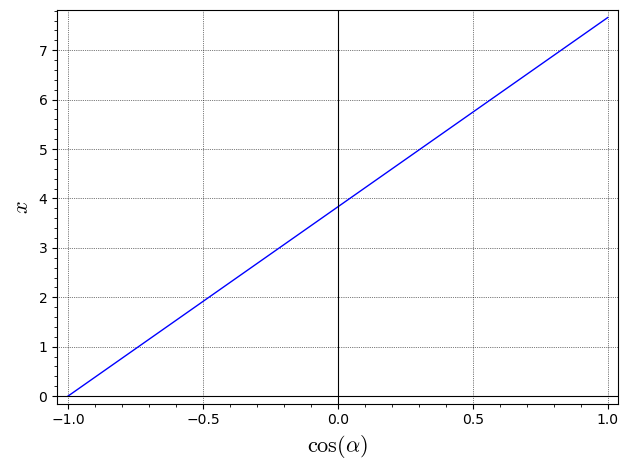

In [8]:
plot3=x(w_test,C_a).plot(-1,1,frame=true,gridlines=true)
plot3.axes_labels([r'$\cos(\alpha)$',r'$x$'])
plot3

the energy fraction of the scattered photons $y=\dfrac{\omega}{E_0}$

$r=\dfrac{y}{x(1-y)}$

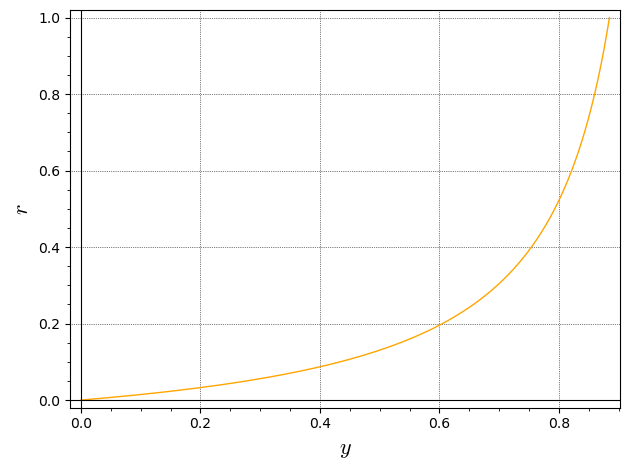

0.884517016117227

In [9]:
r(w,C_a,y)=y/(x*(1-y))
maxy=x(w_test,C_atest)/(x(w_test,C_atest)+1)
plot4=r(w_test,C_atest,y).plot(0,maxy,frame=true,gridlines=true,color='orange') 
plot4.axes_labels([r'$y$',r'$r$'])
plot4
maxy

### The limits for the $y$ variable are
$0\leq y\leq y_{max}=\dfrac{x}{1+x}$

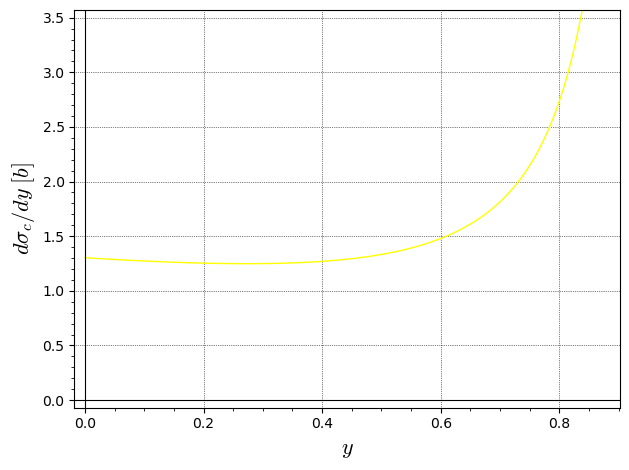

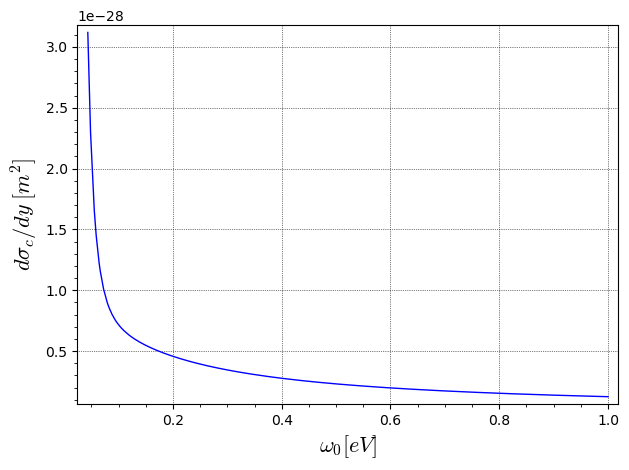

In [11]:
#to=0.25*0.511e6^2/(2*(1-0.25)*E*(1+0.5))
dsigma(w,C_a,y)=((2*np.pi*re^2)/x)*(1/(1-y)+1-y-4*r*(1-r))
scale_ds(w,C_a,y)=dsigma(w,C_a,y)*10e28


ymaxim(w,C_a)=x(w,C_a)/(1+x(w,C_a))

plot5=scale_ds(w_test,C_atest,y).plot(0,ymaxim(w_test,C_atest),ymin=0,ymax=3.5,frame=true,gridlines=true,color='yellow')
plot6=dsigma(w,C_atest,y_test).plot(wmin_test,1,frame=true,gridlines=true,color='blue')

plot5.axes_labels([r'$y$',r'$d\sigma_c/dy\;[b]$'])
plot6.axes_labels([r'$\omega_0[eV]$',r'$d\sigma_c/dy\;[m^2]$'])

#to
plot5
plot6

## Changing the integral differencials

$\dfrac{dN}{dy}=NL\displaystyle\int_{0}^{\pi}\int_{\omega_{min}}^{\infty}\dfrac{d\sigma_c}{dy}(1+\cos(\alpha))\dfrac{dn_\gamma}{d\omega_o}(\omega_0,T)\frac{d\Omega}{4\pi}$

the change in the differencial of the solid angle is taken to be able of integrate over de incident angle of the laser:

$\dfrac{dN}{dy}=\dfrac{NL}{4\pi}\displaystyle\int_{0}^{2\pi}\int_{-1}^{1}\int_{\omega_{min}}^{\infty}\dfrac{d\sigma_c}{dy}(1+\cos(\alpha))\dfrac{dn_\gamma}{d\omega_o}d\omega_0d\cos(\alpha)d\phi$

$\dfrac{dN}{dy}=\dfrac{NL}{2}\displaystyle\int_{-1}^{1}\int_{\omega_{min}}^{\infty}\dfrac{d\sigma_c}{dy}(1+\cos(\alpha))\dfrac{dn_\gamma}{d\omega_o}d\omega_0d\cos(\alpha)$

Testing for the lower limit of the photons energy 

$\omega_{min}=\dfrac{y\cdot m_e^2c^4}{4(1-y)E_0\cos^2(\alpha/2)}$

$\omega_{min}=\dfrac{y\cdot m_e^2c^4}{2(1-y)E_0(1+\cos(\alpha))}$

In [12]:
w_min(y,C_a)=y*((5.11e5)^2)/(2*(1-y)*Eb*(1+C_a))

$I=\dfrac{d\sigma_c}{dy}\cdot(1+\cos(\alpha))\cdot dn_\gamma$

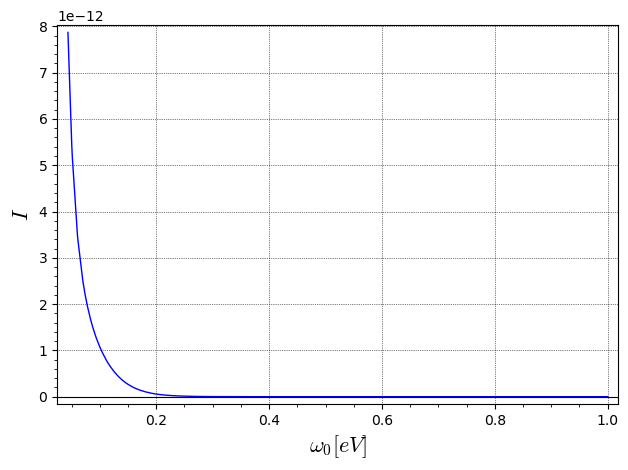

In [41]:
inte_f(w,C_a,y)=dsigma*(1+C_a)*n

plot8= inte_f(w,C_atest,y_test).plot(wmin_test,1,frame=true,gridlines=true)
plot9= inte_f(w_test,C_a,y_test).plot(-1,-1e-6,frame=true,gridlines=true)
plot8.axes_labels([r'$\omega_0[eV]$',r'$I$'])
plot8
#plot9

plot10=plot3d(inte_f(w,C_a,y_test),(w,wmin_test,1),(C_a,-1,1))
#plot10

Adaptive method failure, will try with Romberg, last approximation was undef
Adaptive method failure, will try with Romberg, last approximation was undef
Adaptive method failure, will try with Romberg, last approximation was undef
Adaptive method failure, will try with Romberg, last approximation was undef
Adaptive method failure, will try with Romberg, last approximation was undef
Adaptive method failure, will try with Romberg, last approximation was undef
Adaptive method failure, will try with Romberg, last approximation was undef
Adaptive method failure, will try with Romberg, last approximation was undef
Adaptive method failure, will try with Romberg, last approximation was undef
Adaptive method failure, will try with Romberg, last approximation was undef
Adaptive method failure, will try with Romberg, last approximation was undef
Adaptive method failure, will try with Romberg, last approximation was undef
Adaptive method failure, will try with Romberg, last approximation was undef

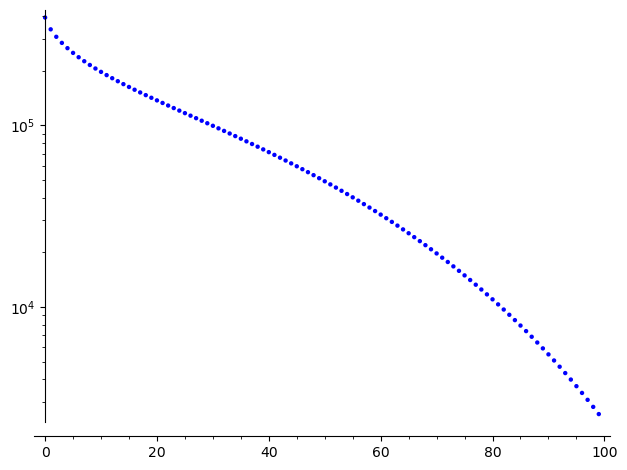

In [59]:
assume(C_a+1>0)
yrangef=np.array(np.linspace(0,0.5,100))
final=[Np*L*2*pi*integrate(integrate(inte_f(w,C_a,y_r),(w,w_min(y_r,C_a),infinity)),(C_a,-1,1)) for y_r in yrangef]
list_plot_semilogy(final)

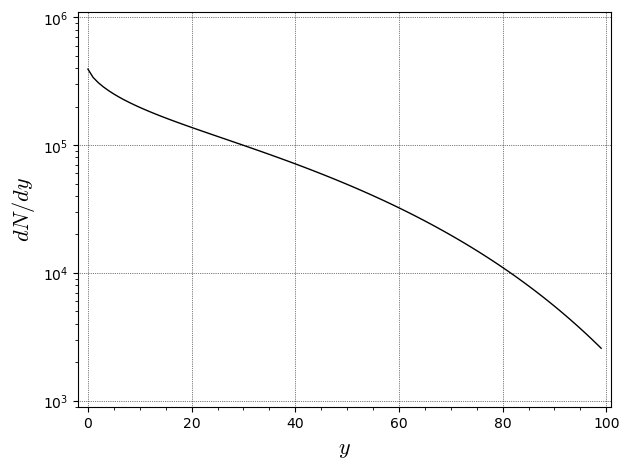

In [60]:
plot11=list_plot_semilogy(final,ymin=1000,ymax=1000000, frame=true, plotjoined=true, gridlines=true,color='black')
plot11.axes_labels([r'$y$',r'$dN/dy$'])
plot11

In [63]:
yrangef

array([0.        , 0.00505051, 0.01010101, 0.01515152, 0.02020202,
       0.02525253, 0.03030303, 0.03535354, 0.04040404, 0.04545455,
       0.05050505, 0.05555556, 0.06060606, 0.06565657, 0.07070707,
       0.07575758, 0.08080808, 0.08585859, 0.09090909, 0.0959596 ,
       0.1010101 , 0.10606061, 0.11111111, 0.11616162, 0.12121212,
       0.12626263, 0.13131313, 0.13636364, 0.14141414, 0.14646465,
       0.15151515, 0.15656566, 0.16161616, 0.16666667, 0.17171717,
       0.17676768, 0.18181818, 0.18686869, 0.19191919, 0.1969697 ,
       0.2020202 , 0.20707071, 0.21212121, 0.21717172, 0.22222222,
       0.22727273, 0.23232323, 0.23737374, 0.24242424, 0.24747475,
       0.25252525, 0.25757576, 0.26262626, 0.26767677, 0.27272727,
       0.27777778, 0.28282828, 0.28787879, 0.29292929, 0.2979798 ,
       0.3030303 , 0.30808081, 0.31313131, 0.31818182, 0.32323232,
       0.32828283, 0.33333333, 0.33838384, 0.34343434, 0.34848485,
       0.35353535, 0.35858586, 0.36363636, 0.36868687, 0.37373